In [23]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

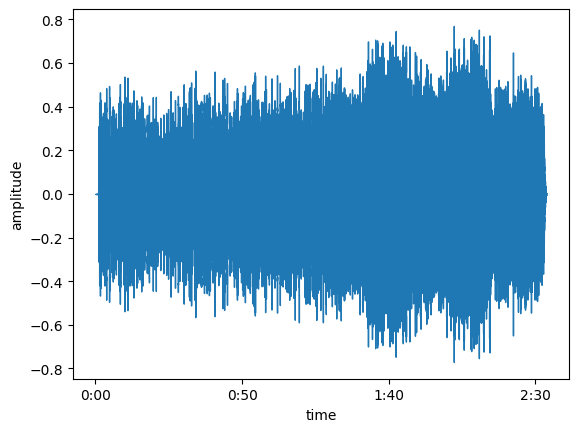

In [24]:
file_path = "Hall of the Kazoo King.mp3"

signal, sample_rate = librosa.load(file_path, sr=22050) # sr * T 
librosa.display.waveshow(signal, sr=sample_rate)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show( )

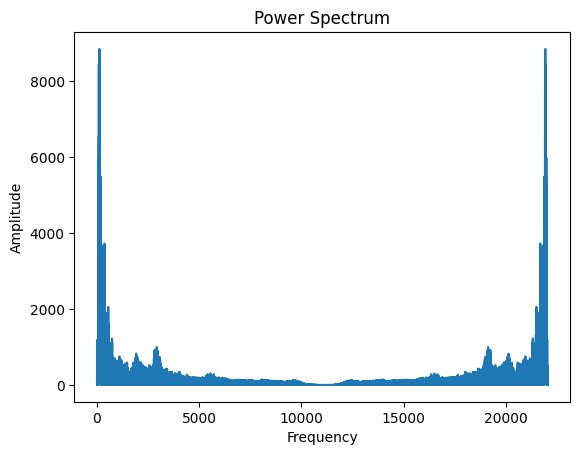

In [25]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)

freq_range = np.linspace(0, sample_rate, len(magnitude))

plt.plot(freq_range, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Power Spectrum")
plt.show()

As can be seeen, the power spectrum is a mirror of itself. Thus, we only need have of it.  

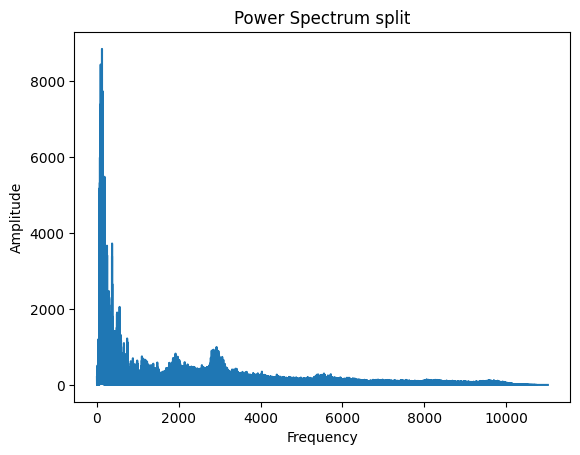

In [27]:
left_freq_range = freq_range[:int(len(freq_range)/2)]
left_mag_range = magnitude[:int(len(freq_range)/2)]
plt.plot(left_freq_range, left_mag_range)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Power Spectrum split")
plt.show()

Get spectogram

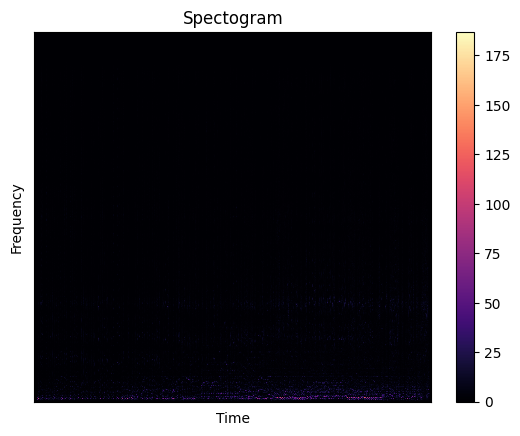

In [29]:
samples_fft = 2048
my_hop_length = 512
stft = librosa.core.stft(signal, hop_length=my_hop_length, n_fft=samples_fft)

spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=my_hop_length, n_fft=samples_fft)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Linear Spectogram")
plt.show()


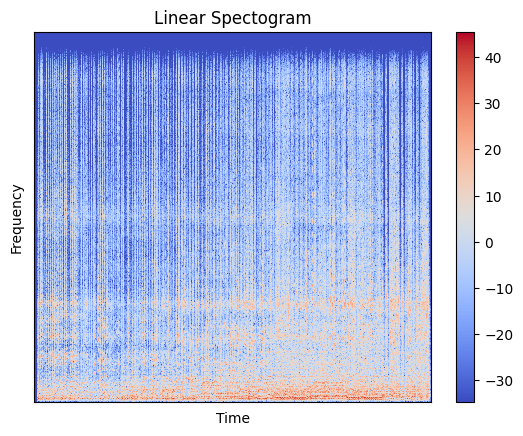

In [30]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=my_hop_length, n_fft=samples_fft)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Linear Spectogram")
plt.show()

Extract MFCCs

C:\Users\kevin\AppData\Local\Temp\ipykernel_4136\55436559.py:1: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.9986314e-07
 -1.3877290e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, n_fft=2048, hop_length=my_hop_length, n_mfcc=13)


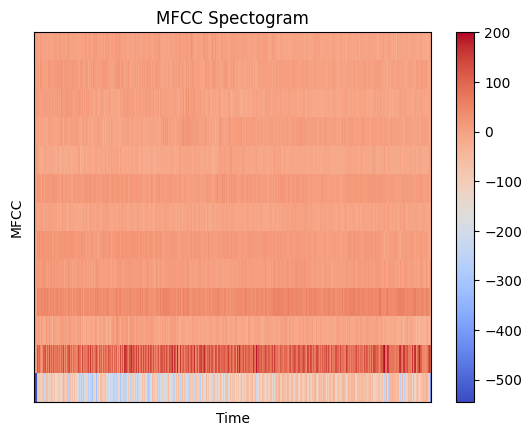

In [32]:
MFCCs = librosa.feature.mfcc(signal, n_fft=2048, hop_length=my_hop_length, n_mfcc=13)

librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=my_hop_length, n_fft=samples_fft)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.title("MFCC Spectogram")
plt.show()